# Exploring Dandiset 000945: Neural Spiking Data in Response to Transcranial Focused Ultrasound Stimulation in Rat Somatosensory Cortex

## Disclaimer
**This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.**

## Overview
This dandiset contains neural spiking data recorded from the somatosensory cortex of awake head-fixed rats during transcranial focused ultrasound (tFUS) stimulation. The researchers tested different pulse repetition frequencies (PRFs): 30 Hz, 300 Hz, 1500 Hz, 3000 Hz, and 4500 Hz, using a 128-element random array ultrasound transducer. The recordings were made using 32-channel NeuroNexus electrodes chronically implanted in the rat brain.

You can view this dataset on Neurosift at: https://neurosift.app/dandiset/000945/000945

## What this notebook will cover
1. Loading the Dandiset and exploring its assets
2. Loading an NWB file and examining its structure
3. Analyzing spike times and cell types
4. Visualizing neural responses to ultrasound stimulation
5. Comparing responses across different neuron types

## Required Packages
The following packages are needed to run this notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import h5py
import remfile
import pynwb
from dandi.dandiapi import DandiAPIClient
from scipy import stats
import warnings

# Set up plotting
sns.set_theme()
warnings.filterwarnings('ignore')  # Suppress warnings

## Loading the Dandiset

We'll start by connecting to the DANDI archive and loading information about Dandiset 000945.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000945")
assets = list(dandiset.get_assets())

# Get metadata
metadata = dandiset.get_metadata()
print(f"Dandiset name: {metadata.name}")
print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Neural Spiking Data in the Awake Rat Somatosensory Cortex Responding to Trials of Transcranial Focused Ultrasound Stimulation
Found 75 assets in the dataset

First 5 assets:
- sub-BH498/sub-BH498_ses-20240306T124227_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T200606_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T191833_ecephys.nwb
- sub-BH498/sub-BH498_ses-20230906T180913_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T204552_ecephys.nwb


Let's examine the subjects and sessions available in this dataset by organizing the assets by subject.

In [3]:
# Organize assets by subject
subjects = {}
for asset in assets:
    path = asset.path
    subject_id = path.split('/')[0]
    
    if subject_id not in subjects:
        subjects[subject_id] = []
    
    subjects[subject_id].append(path)

# Print summary
print(f"Number of subjects: {len(subjects)}")
for subject, files in subjects.items():
    print(f"\n{subject}: {len(files)} files")
    # Print just the first 3 files if there are many
    for file in files[:3]:
        print(f"  - {file}")
    if len(files) > 3:
        print(f"  - ... and {len(files) - 3} more files")

Number of subjects: 10

sub-BH498: 13 files
  - sub-BH498/sub-BH498_ses-20240306T124227_ecephys.nwb
  - sub-BH498/sub-BH498_ses-20240305T200606_ecephys.nwb
  - sub-BH498/sub-BH498_ses-20240305T191833_ecephys.nwb
  - ... and 10 more files

sub-BH506: 9 files
  - sub-BH506/sub-BH506_ses-20231026T155106_ecephys.nwb
  - sub-BH506/sub-BH506_ses-20231018T181609_ecephys.nwb
  - sub-BH506/sub-BH506_ses-20231026T172706_ecephys.nwb
  - ... and 6 more files

sub-BH508: 10 files
  - sub-BH508/sub-BH508_ses-20230827T172257_ecephys.nwb
  - sub-BH508/sub-BH508_ses-20230827T140843_ecephys.nwb
  - sub-BH508/sub-BH508_ses-20230818T232609_ecephys.nwb
  - ... and 7 more files

sub-BH512: 12 files
  - sub-BH512/sub-BH512_ses-20231013T125904_ecephys.nwb
  - sub-BH512/sub-BH512_ses-20231017T111224_ecephys.nwb
  - sub-BH512/sub-BH512_ses-20231013T144925_ecephys.nwb
  - ... and 9 more files

sub-BH519: 5 files
  - sub-BH519/sub-BH519_ses-20231013T121604_ecephys.nwb
  - sub-BH519/sub-BH519_ses-20231022T163921_e

## Loading an NWB file

Now, let's load one of the NWB files to examine its structure. We'll use the file from subject BH497 with a 3000 Hz pulse repetition frequency.

In [4]:
# Select a specific NWB file to analyze
asset_id = "a4e04662-e4cb-49f3-9076-41e04e833a11"
file_path = "sub-BH497/sub-BH497_ses-20240310T143729_ecephys.nwb"
url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"

print(f"Loading NWB file: {file_path}")
print(f"URL: {url}")

# Load the file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

Loading NWB file: sub-BH497/sub-BH497_ses-20240310T143729_ecephys.nwb
URL: https://api.dandiarchive.org/api/assets/a4e04662-e4cb-49f3-9076-41e04e833a11/download/


Let's examine the basic metadata of this file:

In [5]:
# Print basic metadata
print(f"File identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Institution: {nwb.institution}")

# Subject information
print("\nSubject information:")
print(f"  ID: {nwb.subject.subject_id}")
print(f"  Age: {nwb.subject.age}")
print(f"  Sex: {nwb.subject.sex}")
print(f"  Species: {nwb.subject.species}")
print(f"  Description: {nwb.subject.description}")

File identifier: BH498_3000_200_anes
Session description: Awake S1 Stimulation by tFUS
Session start time: 2024-03-10 14:37:29-04:00
Institution: Carnegie Mellon University

Subject information:
  ID: BH497
  Age: P24W
  Sex: M
  Species: Rattus norvegicus
  Description: HSD:WI rat


Now let's look at the electrode and device information:

In [6]:
# Print electrode and device information
print("Device information:")
for device_name, device in nwb.devices.items():
    print(f"  {device_name}: {device.description} (Manufacturer: {device.manufacturer})")

print("\nElectrode group information:")
for group_name, group in nwb.electrode_groups.items():
    print(f"  {group_name}: {group.description}, Location: {group.location}")

Device information:
  array: A1x32-Poly3-10mm-50-177-Z32 (Manufacturer: Neuronexus)

Electrode group information:
  shank1: electrode group for shank1, Location: brain area


## Examining the electrodes data

In [7]:
# Convert electrodes to a DataFrame for easier viewing
electrodes_df = nwb.electrodes.to_dataframe()
print(f"Number of electrodes: {len(electrodes_df)}")
print("\nFirst 5 electrodes:")
electrodes_df.head()

Number of electrodes: 32

First 5 electrodes:


,x,y,z,imp,location,filtering,group,group_name
id,,,,,,,,
0,1.0,10.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x13988...,shank1elec1
1,1.0,11.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x13988...,shank1elec2
2,1.0,9.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x13988...,shank1elec3
3,1.0,8.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x13988...,shank1elec4
4,1.0,7.0,0.0,NaN,unknown,unknown,shank1 pynwb.ecephys.ElectrodeGroup at 0x13988...,shank1elec5


## Examining the trial data

The dataset contains multiple trials of ultrasound stimulation. Let's examine the trial structure.

In [8]:
# Convert trials to a DataFrame
trials_df = nwb.trials.to_dataframe()
print(f"Number of trials: {len(trials_df)}")
print("\nFirst 5 trials:")
trials_df.head()

Number of trials: 500

First 5 trials:


,start_time,stop_time
id,,
1,0.408248,2.608248
2,3.050619,5.250619
3,5.559296,7.759296
4,8.108483,10.308483
5,10.392863,12.592863


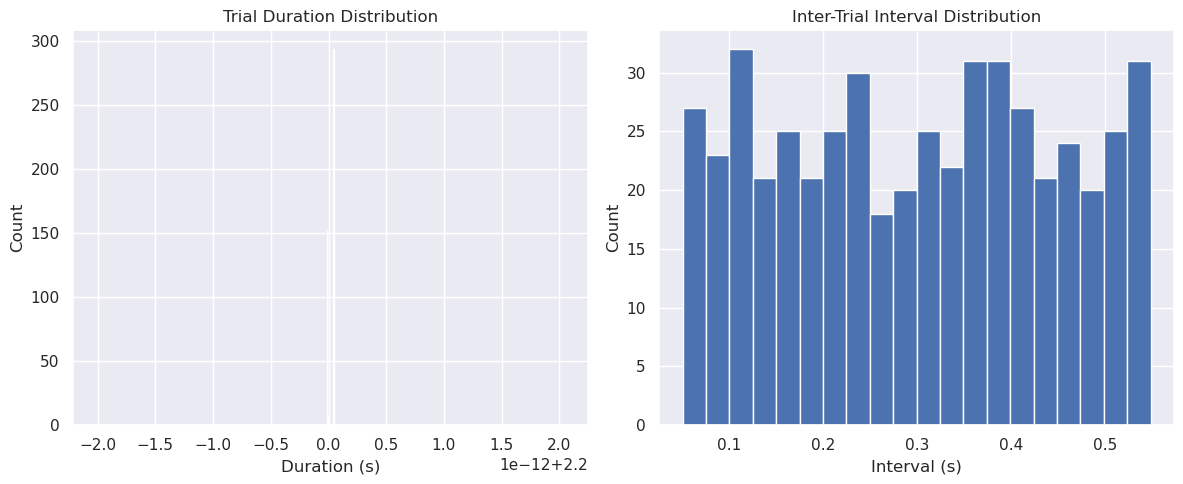

In [9]:
# Calculate trial durations and inter-trial intervals
trials_df['duration'] = trials_df['stop_time'] - trials_df['start_time']
trials_df['inter_trial_interval'] = trials_df['start_time'].shift(-1) - trials_df['stop_time']

# Plot trial durations
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(trials_df['duration'], bins=20)
plt.title('Trial Duration Distribution')
plt.xlabel('Duration (s)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(trials_df['inter_trial_interval'].dropna(), bins=20)
plt.title('Inter-Trial Interval Distribution')
plt.xlabel('Interval (s)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Examining the units (neurons) data

Now let's look at the neural units recorded in this dataset. The dataset includes spike times for each unit, as well as a cell type label.

In [10]:
# Convert units to a DataFrame
units_df = nwb.units.to_dataframe()
print(f"Number of units: {len(units_df)}")
print("\nColumns in the units table:")
for col in units_df.columns:
    print(f"- {col}")

Number of units: 64

Columns in the units table:
- spike_times
- celltype_label


In [11]:
# Map cell type labels to their descriptions
cell_type_map = {1: 'RSU (Regular Spiking Unit)', 2: 'FSU (Fast Spiking Unit)'}
units_df['cell_type'] = units_df['celltype_label'].map(cell_type_map)

# Count units of each cell type
cell_type_counts = units_df['cell_type'].value_counts()
print("Cell type distribution:")
for cell_type, count in cell_type_counts.items():
    print(f"- {cell_type}: {count} units")

Cell type distribution:
- FSU (Fast Spiking Unit): 32 units
- RSU (Regular Spiking Unit): 32 units


Let's examine the spike times for a few example neurons to understand their activity patterns:

In [12]:
# Function to get spike times for a given unit
def get_unit_spike_times(unit_id):
    return nwb.units['spike_times'][unit_id]

# Select a few example units to examine
example_unit_ids = [0, 1, 2]  # First three units
for unit_id in example_unit_ids:
    spike_times = get_unit_spike_times(unit_id)
    cell_type = units_df.loc[unit_id, 'cell_type']
    
    print(f"Unit {unit_id} ({cell_type}):")
    print(f"  Total spikes: {len(spike_times)}")
    print(f"  Time range: {spike_times[0]:.2f}s to {spike_times[-1]:.2f}s")
    print(f"  Mean firing rate: {len(spike_times) / (spike_times[-1] - spike_times[0]):.2f} Hz")
    print("")

Unit 0 (FSU (Fast Spiking Unit)):
  Total spikes: 16362
  Time range: 0.07s to 1265.67s
  Mean firing rate: 12.93 Hz

Unit 1 (RSU (Regular Spiking Unit)):
  Total spikes: 16155
  Time range: 0.12s to 1265.67s
  Mean firing rate: 12.77 Hz

Unit 2 (FSU (Fast Spiking Unit)):
  Total spikes: 11755
  Time range: 0.02s to 1265.34s
  Mean firing rate: 9.29 Hz



## Visualizing spike activity around ultrasound stimulation

Now let's examine how the neurons respond to ultrasound stimulation. We'll create raster plots and peri-stimulus time histograms (PSTHs) for selected units.

In [13]:
def create_raster_and_psth(unit_id, window=(-0.5, 1.5), bin_size=0.01):
    """
    Create a raster plot and PSTH for a specific unit around stimulus onset.
    
    Parameters:
    -----------
    unit_id : int
        The ID of the unit to analyze
    window : tuple
        Time window around stimulus onset (in seconds)
    bin_size : float
        Bin size for the PSTH (in seconds)
    """
    unit_spikes = get_unit_spike_times(unit_id)
    cell_type = units_df.loc[unit_id, 'cell_type']
    
    # Get trial start times
    trial_starts = trials_df['start_time'].values
    
    # Initialize plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, 
                                   gridspec_kw={'height_ratios': [3, 1]})
    
    # Collect all spikes relative to trial starts for PSTH
    all_relative_spikes = []
    
    # Create raster plot
    for i, trial_start in enumerate(trial_starts):
        # Find spikes within the window for this trial
        mask = ((unit_spikes >= trial_start + window[0]) & 
                (unit_spikes <= trial_start + window[1]))
        trial_spikes = unit_spikes[mask] - trial_start
        
        all_relative_spikes.extend(trial_spikes)
        
        # Plot raster dots
        ax1.plot(trial_spikes, np.ones_like(trial_spikes) * i, '|', color='black', markersize=4)
    
    ax1.set_ylabel('Trial #')
    ax1.set_title(f'Unit {unit_id} ({cell_type}) - Raster Plot')
    
    # Create PSTH
    bin_edges = np.arange(window[0], window[1] + bin_size, bin_size)
    hist, bins = np.histogram(all_relative_spikes, bins=bin_edges)
    
    # Convert spike counts to firing rate (spikes/s)
    hist = hist / (bin_size * len(trial_starts))
    
    # Plot PSTH
    ax2.bar(bins[:-1], hist, width=bin_size, color='blue', alpha=0.7)
    ax2.set_xlabel('Time from stimulus onset (s)')
    ax2.set_ylabel('Firing rate (Hz)')
    ax2.set_title('Peri-Stimulus Time Histogram (PSTH)')
    
    # Add vertical line at stimulus onset
    ax1.axvline(x=0, color='red', linestyle='--', alpha=0.8)
    ax2.axvline(x=0, color='red', linestyle='--', alpha=0.8)
    
    # Find stimulus offset based on median trial duration
    stim_offset = trials_df['duration'].median()
    ax1.axvline(x=stim_offset, color='blue', linestyle='--', alpha=0.6)
    ax2.axvline(x=stim_offset, color='blue', linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    return fig

Let's analyze a few example units to see how they respond to the ultrasound stimulation:

In [14]:
# Find units with a good number of spikes for analysis
unit_spike_counts = {i: len(get_unit_spike_times(i)) for i in range(5)}
sorted_units = sorted(unit_spike_counts.items(), key=lambda x: x[1], reverse=True)
print("Units with the most spikes:")
for unit_id, count in sorted_units:
    cell_type = units_df.loc[unit_id, 'cell_type']
    print(f"Unit {unit_id} ({cell_type}): {count} spikes")

Units with the most spikes:
Unit 0 (FSU (Fast Spiking Unit)): 16362 spikes
Unit 1 (RSU (Regular Spiking Unit)): 16155 spikes
Unit 4 (FSU (Fast Spiking Unit)): 13245 spikes
Unit 3 (RSU (Regular Spiking Unit)): 11774 spikes
Unit 2 (FSU (Fast Spiking Unit)): 11755 spikes


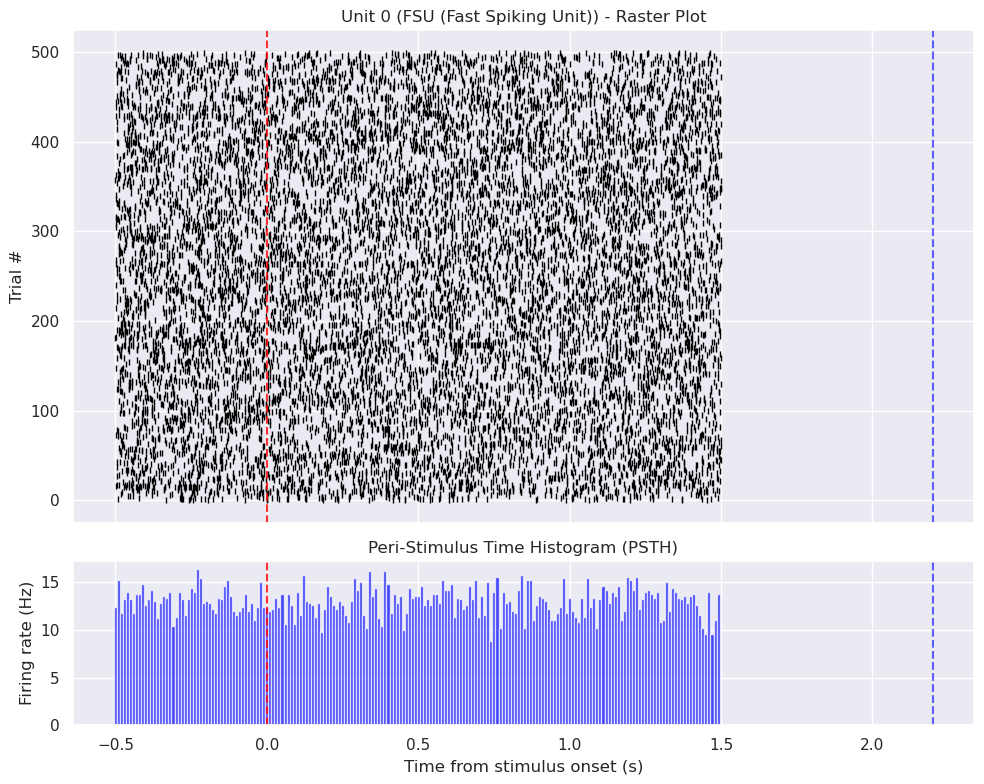

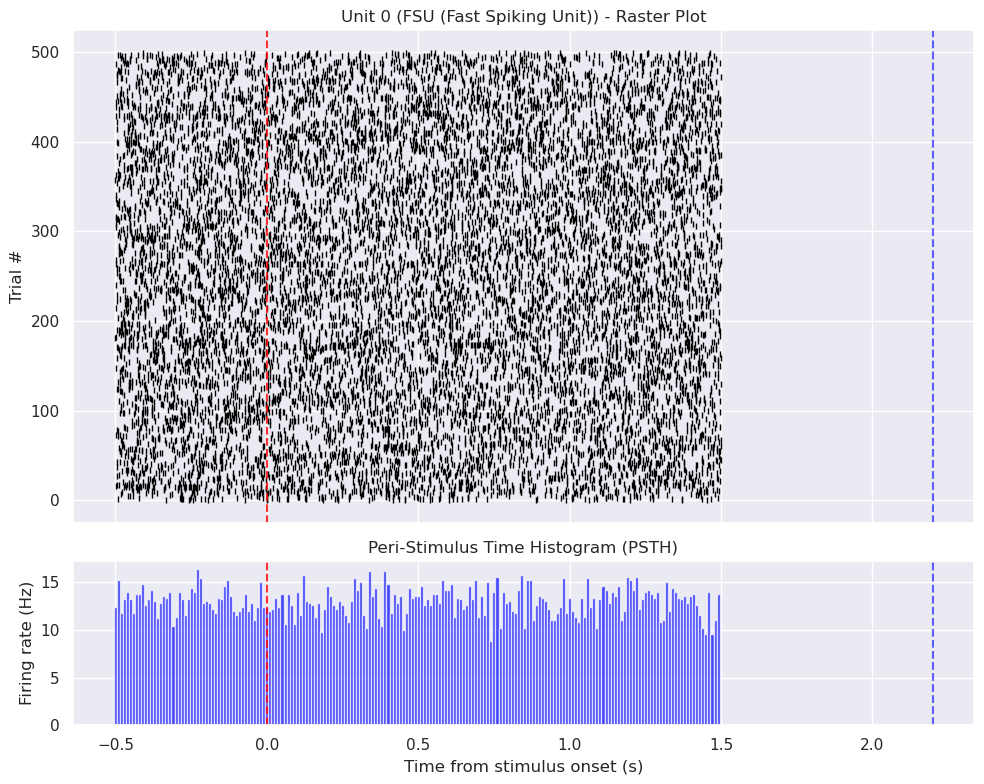

In [15]:
# Create raster and PSTH for a selected unit
create_raster_and_psth(0)

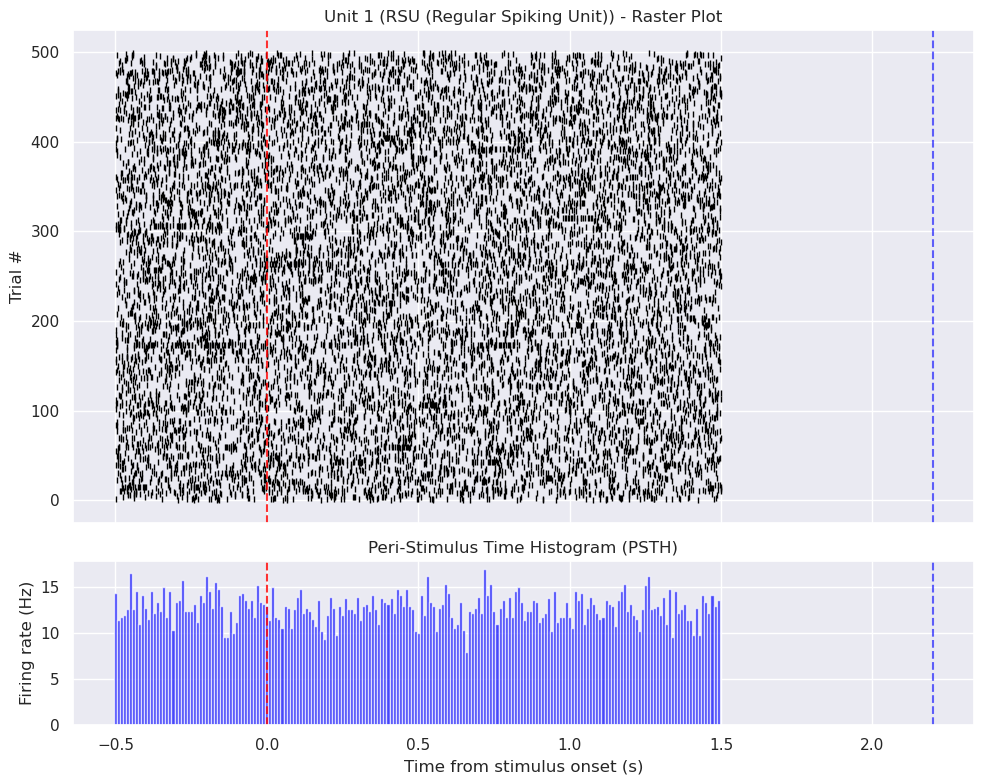

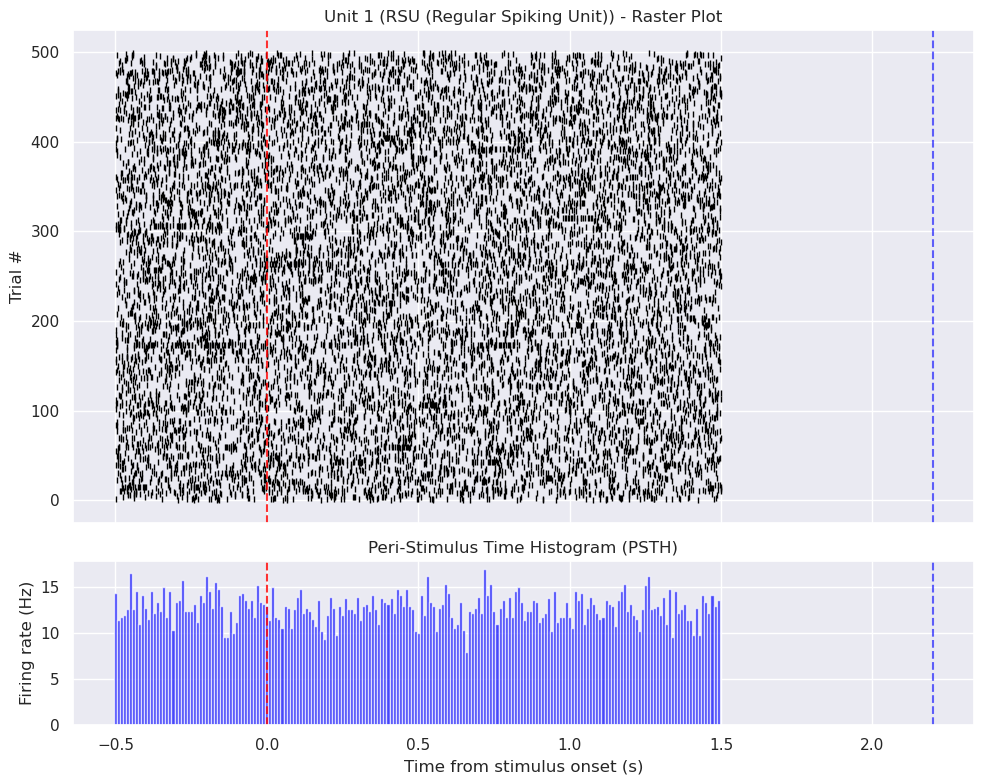

In [16]:
# Compare with another unit
create_raster_and_psth(1)

## Comparing responses across cell types

Now let's compare how the different cell types (RSU vs FSU) respond to the ultrasound stimulation.

In [17]:
def calculate_response_metrics(unit_id, pre_window=(-0.5, 0), post_window=(0, 0.5)):
    """
    Calculate response metrics for a unit.
    
    Parameters:
    -----------
    unit_id : int
        The ID of the unit to analyze
    pre_window : tuple
        Time window before stimulus (in seconds)
    post_window : tuple
        Time window after stimulus (in seconds)
    
    Returns:
    --------
    dict : 
        Dictionary of response metrics
    """
    unit_spikes = get_unit_spike_times(unit_id)
    trial_starts = trials_df['start_time'].values
    
    pre_rates = []
    post_rates = []
    
    # Calculate firing rates before and after each trial
    for trial_start in trial_starts:
        # Pre-stimulus window
        pre_mask = ((unit_spikes >= trial_start + pre_window[0]) & 
                   (unit_spikes <= trial_start + pre_window[1]))
        pre_spikes = unit_spikes[pre_mask]
        pre_rate = len(pre_spikes) / (pre_window[1] - pre_window[0])
        pre_rates.append(pre_rate)
        
        # Post-stimulus window
        post_mask = ((unit_spikes >= trial_start + post_window[0]) & 
                    (unit_spikes <= trial_start + post_window[1]))
        post_spikes = unit_spikes[post_mask]
        post_rate = len(post_spikes) / (post_window[1] - post_window[0])
        post_rates.append(post_rate)
    
    # Calculate mean firing rates
    mean_pre_rate = np.mean(pre_rates)
    mean_post_rate = np.mean(post_rates)
    
    # Calculate response modulation
    modulation = (mean_post_rate - mean_pre_rate) / (mean_post_rate + mean_pre_rate + 1e-10)
    
    # Statistical significance (paired t-test)
    t_stat, p_value = stats.ttest_rel(post_rates, pre_rates)
    
    return {
        'unit_id': unit_id,
        'mean_pre_rate': mean_pre_rate,
        'mean_post_rate': mean_post_rate,
        'modulation': modulation,
        'p_value': p_value,
        't_stat': t_stat,
        'significant': p_value < 0.05
    }

In [18]:
# Calculate response metrics for all units
response_metrics = []
for unit_id in range(len(units_df)):
    metrics = calculate_response_metrics(unit_id)
    metrics['cell_type'] = units_df.loc[unit_id, 'cell_type']
    response_metrics.append(metrics)

# Convert to DataFrame
response_df = pd.DataFrame(response_metrics)
response_df['response_type'] = np.where(response_df['modulation'] > 0, 'Enhanced', 'Suppressed')
response_df['response_type'] = np.where(response_df['significant'], response_df['response_type'], 'No Response')

Let's analyze the distribution of response types across cell types:

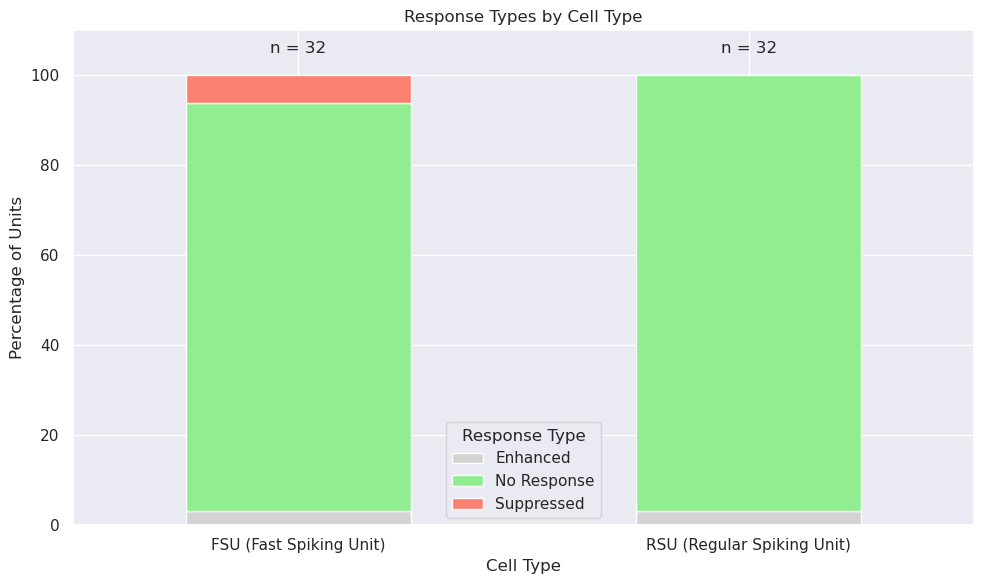

In [19]:
# Count units by response type and cell type
response_counts = pd.crosstab(response_df['cell_type'], response_df['response_type'])
response_percentages = response_counts.div(response_counts.sum(axis=1), axis=0) * 100

# Plot as a stacked bar chart
ax = response_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), 
                              color=['lightgrey', 'lightgreen', 'salmon'])
plt.title('Response Types by Cell Type')
plt.xlabel('Cell Type')
plt.ylabel('Percentage of Units')
plt.legend(title='Response Type')
plt.xticks(rotation=0)

# Add count labels
for i, cell_type in enumerate(response_percentages.index):
    total = response_counts.loc[cell_type].sum()
    plt.text(i, 105, f"n = {total}", ha='center')

plt.ylim(0, 110)
plt.tight_layout()
plt.show()

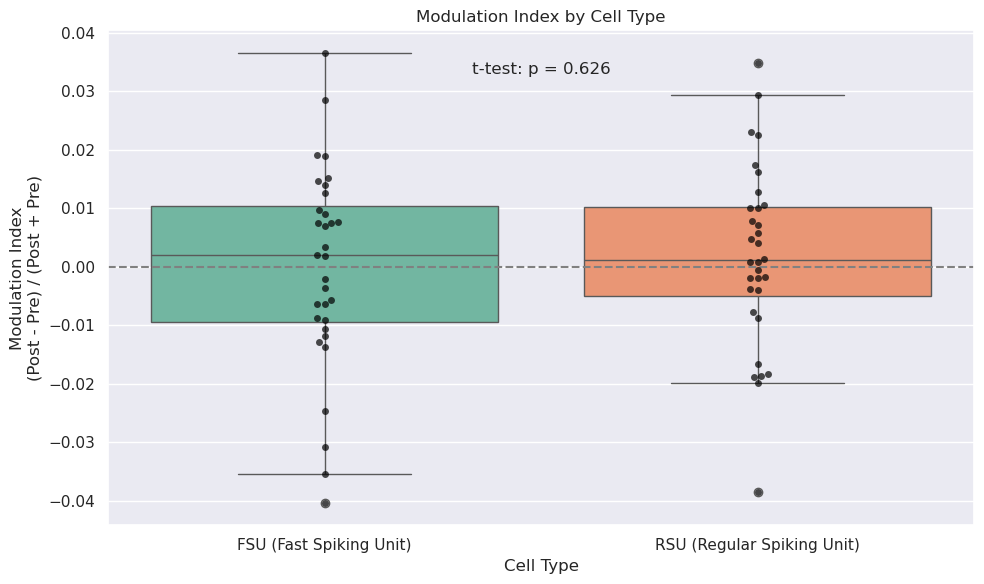

In [20]:
# Compare modulation index between cell types
plt.figure(figsize=(10, 6))
sns.boxplot(x='cell_type', y='modulation', data=response_df, palette='Set2')
sns.swarmplot(x='cell_type', y='modulation', data=response_df, color='black', alpha=0.7)

plt.axhline(y=0, color='grey', linestyle='--')
plt.title('Modulation Index by Cell Type')
plt.xlabel('Cell Type')
plt.ylabel('Modulation Index\n(Post - Pre) / (Post + Pre)')

# Add statistical test
rsu_data = response_df[response_df['cell_type'] == 'RSU (Regular Spiking Unit)']['modulation']
fsu_data = response_df[response_df['cell_type'] == 'FSU (Fast Spiking Unit)']['modulation']
t_stat, p_val = stats.ttest_ind(rsu_data, fsu_data)
plt.text(0.5, response_df['modulation'].max() * 0.9, 
         f"t-test: p = {p_val:.3f}", 
         ha='center')

plt.tight_layout()
plt.show()

## Advanced visualization: Trial-to-trial variability in neural responses

Let's examine how neural responses vary from trial to trial by creating a heatmap of firing rates across trials.

In [21]:
def create_trial_heatmap(unit_id, window=(-0.5, 1.5), bin_size=0.05):
    """
    Create a heatmap of firing rates across trials for a specific unit.
    
    Parameters:
    -----------
    unit_id : int
        The ID of the unit to analyze
    window : tuple
        Time window around stimulus onset (in seconds)
    bin_size : float
        Bin size for the firing rate calculation (in seconds)
    """
    unit_spikes = get_unit_spike_times(unit_id)
    cell_type = units_df.loc[unit_id, 'cell_type']
    
    # Get trial start times
    trial_starts = trials_df['start_time'].values
    
    # Create time bins
    time_bins = np.arange(window[0], window[1] + bin_size, bin_size)
    bin_centers = time_bins[:-1] + bin_size/2
    
    # Initialize matrix for firing rates (trials x time bins)
    firing_rates = np.zeros((len(trial_starts), len(time_bins) - 1))
    
    # Calculate firing rates for each trial and time bin
    for i, trial_start in enumerate(trial_starts):
        for j in range(len(time_bins) - 1):
            bin_start = trial_start + time_bins[j]
            bin_end = trial_start + time_bins[j + 1]
            
            # Count spikes in this bin
            mask = (unit_spikes >= bin_start) & (unit_spikes < bin_end)
            spike_count = np.sum(mask)
            
            # Convert to firing rate (Hz)
            firing_rates[i, j] = spike_count / bin_size
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [4, 1]})
    
    # Plot heatmap
    im = ax1.imshow(firing_rates, aspect='auto', cmap='viridis', 
                   extent=[window[0], window[1], len(trial_starts), 0])
    
    ax1.set_xlabel('Time from stimulus onset (s)')
    ax1.set_ylabel('Trial #')
    ax1.set_title(f'Unit {unit_id} ({cell_type}) - Trial-by-Trial Firing Rate')
    
    # Add vertical line at stimulus onset
    ax1.axvline(x=0, color='red', linestyle='--', alpha=0.8)
    
    # Find stimulus offset based on median trial duration
    stim_offset = trials_df['duration'].median()
    ax1.axvline(x=stim_offset, color='blue', linestyle='--', alpha=0.6)
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax1)
    cbar.set_label('Firing Rate (Hz)')
    
    # Calculate mean firing rate across trials for each time bin
    mean_firing_rate = np.mean(firing_rates, axis=0)
    sem_firing_rate = stats.sem(firing_rates, axis=0)
    
    # Plot mean firing rate
    ax2.plot(mean_firing_rate, bin_centers, color='black')
    ax2.fill_betweenx(bin_centers, 
                     mean_firing_rate - sem_firing_rate,
                     mean_firing_rate + sem_firing_rate,
                     color='gray', alpha=0.3)
    
    ax2.set_xlabel('Mean Firing Rate (Hz)')
    ax2.set_yticks([])
    ax2.set_title('Mean Response')
    
    # Add horizontal lines at stimulus onset and offset
    ax2.axhline(y=0, color='red', linestyle='--', alpha=0.8)
    ax2.axhline(y=stim_offset, color='blue', linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    return fig

Creating heatmap for unit 62, the most responsive unit


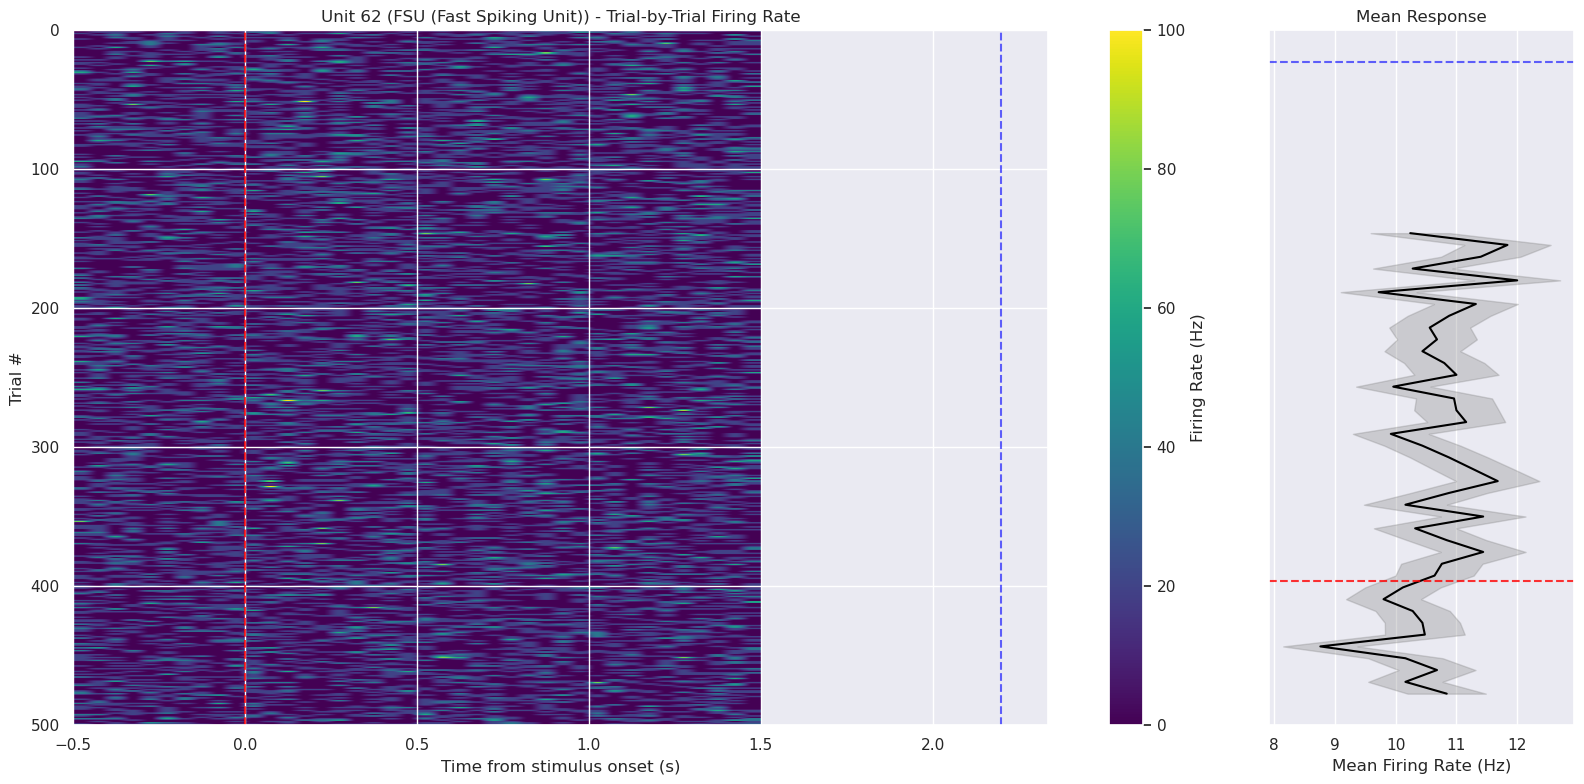

In [22]:
# Create trial heatmap for an interesting unit
# Choose a unit with a strong response
responsive_units = response_df[response_df['significant']].sort_values(by='t_stat', ascending=False)
if len(responsive_units) > 0:
    top_unit_id = responsive_units.iloc[0]['unit_id']
    print(f"Creating heatmap for unit {int(top_unit_id)}, the most responsive unit")
    create_trial_heatmap(int(top_unit_id))
else:
    # If no significant units, use the first unit
    print("No significantly responsive units found, using unit 0 instead")
    create_trial_heatmap(0)

## Summary and Future Directions

In this notebook, we've explored Dandiset 000945, which contains neural spiking data from rat somatosensory cortex during transcranial focused ultrasound stimulation.

We've shown how to:
1. Load the Dandiset and explore its assets
2. Load an NWB file and examine its structure
3. Extract and visualize spike times for different neurons
4. Create raster plots and PSTHs to analyze neuron responses to ultrasound stimulation
5. Compare responses between different cell types (RSU vs FSU)
6. Visualize trial-to-trial variability in neural responses

Future analyses could include:
- Comparing responses across different ultrasound pulse repetition frequencies
- Analyzing response latency and duration
- Investigating population-level responses and correlations between neurons
- Examining how responses change over time during the experiment
- Comparing awake vs anesthetized responses

This dataset provides valuable information about how focused ultrasound stimulation affects neural activity in the somatosensory cortex, which could have implications for non-invasive neuromodulation techniques.